In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numba import jit
%matplotlib notebook
from scipy.sparse import csr_matrix, isspmatrix

In [2]:
@jit(nopython=True)
def mandelbrot(largeur, hauteur, max_iteration, xmin, xmax, ymin, ymax):
    mandelbrot_mat = np.zeros((largeur, hauteur))
    for x in range(hauteur):
        cx = (x * (xmax - xmin) / hauteur + xmin)
        for y in range(largeur):
            cy = (y * (ymin - ymax) / largeur + ymax)
            xn, yn, n = 0, 0, 0
            while (xn**2 + yn**2) < 4 and n < max_iteration:
                tmp_x, tmp_y = xn, yn
                xn = tmp_x**2 - tmp_y**2 + cx
                yn = 2 * tmp_x * tmp_y + cy
                n = n + 1
            if n < max_iteration:
                mandelbrot_mat[y, x] = 1
    return mandelbrot_mat

<IPython.core.display.Javascript object>


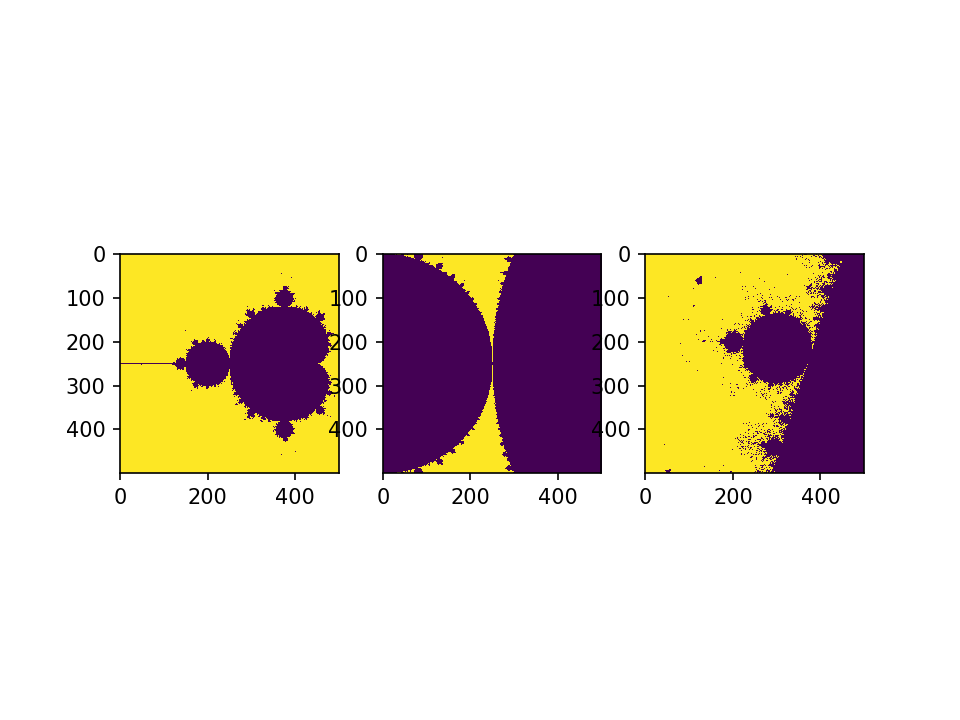

<IPython.core.display.Javascript object>


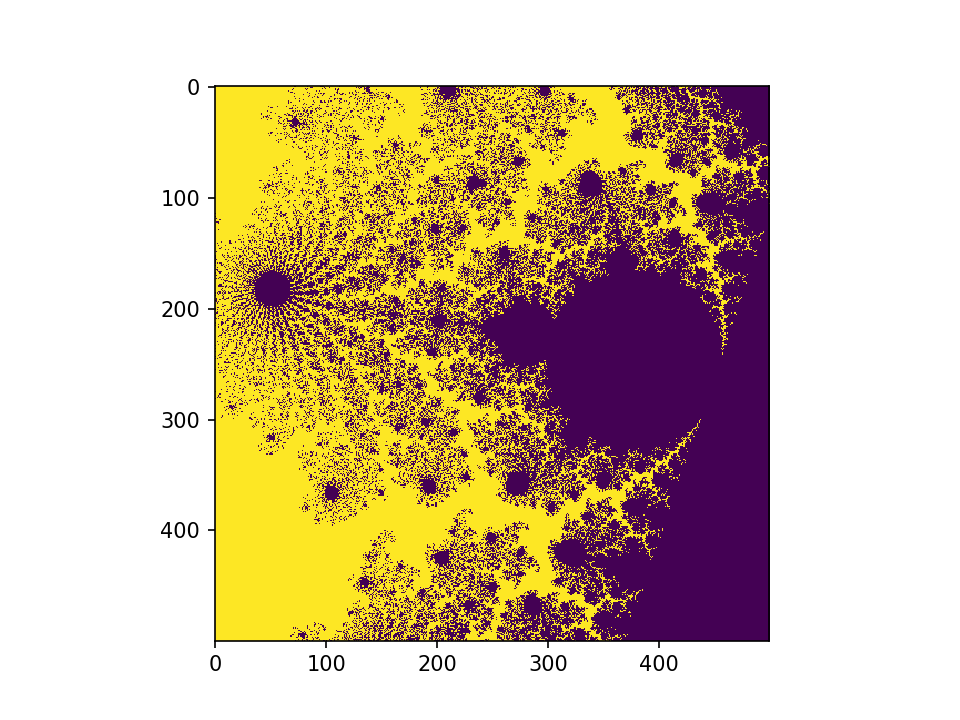

In [3]:
%matplotlib notebook

fig, ax = plt.subplots(1,3)
ax[0].imshow(mandelbrot(500, 500, 50, -2, 0.5, -1.25, 1.25)) #Plot of the Mandelbrot set
#Thanks to this plot and each plot of a sparse matrix, we can precisely find new values of xmin/max and ymin/max to make an over zoom on a characteristic patern of the set

#Avec %matplotlib notebook j'ai pu connaître la valeur des abscisses et ordonnées sur lesquelles je voulais zoomer (j'ai eu besoin de chercher les points sur des plot d'ensemble déjà zoomés parce que je voulais vraiment zoomer sur de très petites zones, ça donne des matrices avec beaucoup de 0 et peu de 1, donc des matrices creuses, mais j'utilise pas la matrice directement, plutôt sa version plot, donc je sais pas si ça compte...) et j'ai obtenu les nouvelles valeurs de xmin/max et ymin/max avec les formules:
#x = (abscisse * (xmax - xmin) / largeur + xmin)
#y = (ordonnée * (ymin - ymax) / hauteur + ymax)

#First plot of a characteristic pattern of the Mandelbrot set:
Z=mandelbrot(500,500,1000,-1, -0.5, -0.25, 0.25) 
#This is a sparse matrix:
isspmatrix(csr_matrix(Z))
ax[1].imshow(Z)
#On trouve de nouveaux xmin/max et ymin/max grâce à la matrice creuse (version zoomée de l'ensemble de base) et à %matplotlibnotebook (j'ai dû utiliser une deuxième sparse matrix parce que le zoom n'était pas encore assez fort pour repérer les motifs connus de l'ensemble de Mandebrot...)
Z_1=mandelbrot(500,500,600,-0.74,-0.71,0.19,0.22)
isspmatrix(Z_1)
ax[2].imshow(Z_1)
#Chraracteristic patern:
fig = plt.figure()
Z_2=mandelbrot(500,500,600,-0.718,-0.714,0.213,0.217)
plt.imshow(Z_2)

<IPython.core.display.Javascript object>


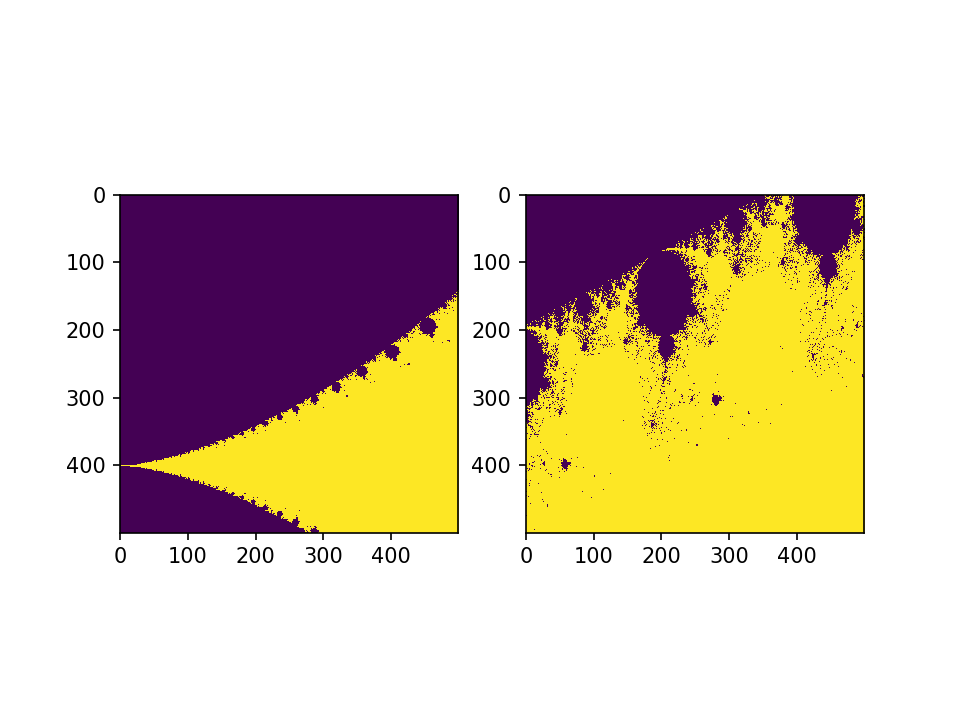

<IPython.core.display.Javascript object>


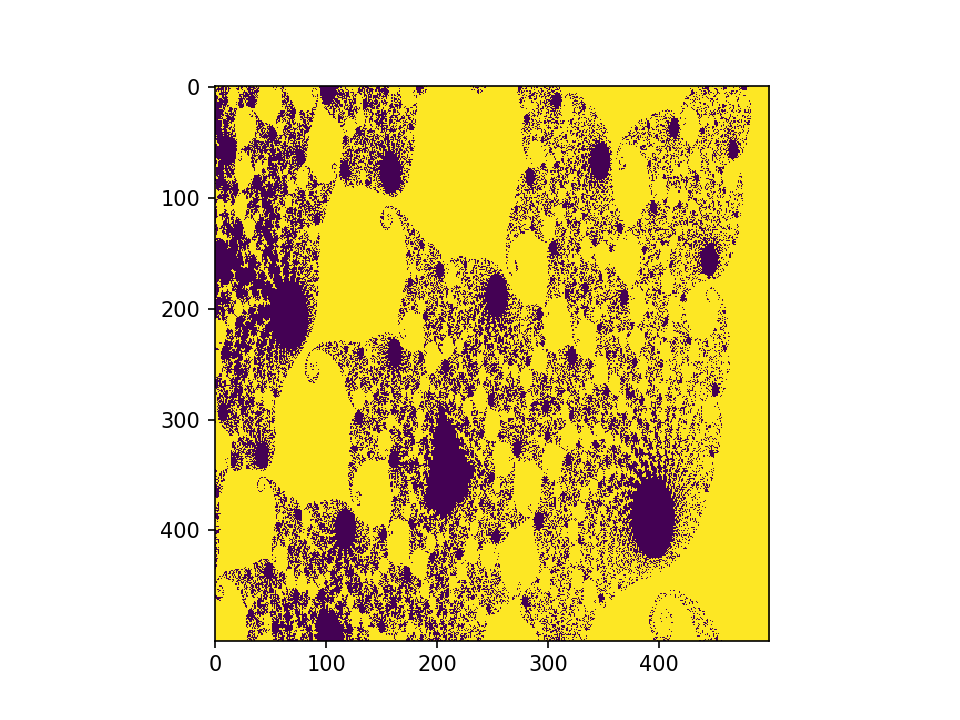

In [6]:
fig, ax = plt.subplots(1,2)
#Second plot of a characteristic pattern of the Mandelbrot set (elephant valley):
Z_3=mandelbrot(500,500,600,0.25,0.30,-0.01,0.04) #An over sparse matrix
isspmatrix(csr_matrix(Z_3))
ax[0].imshow(Z_3)
Z_4=mandelbrot(500,500,600,0.2615,0.2634,0.0018,0.003) #Sparse matrix again
ax[1].imshow(Z_4)
#Second plot:
fig = plt.figure()
Z_5=mandelbrot(500,500,600,0.26185,0.26196,0.002515,0.002573)
plt.imshow(Z_5)

<IPython.core.display.Javascript object>


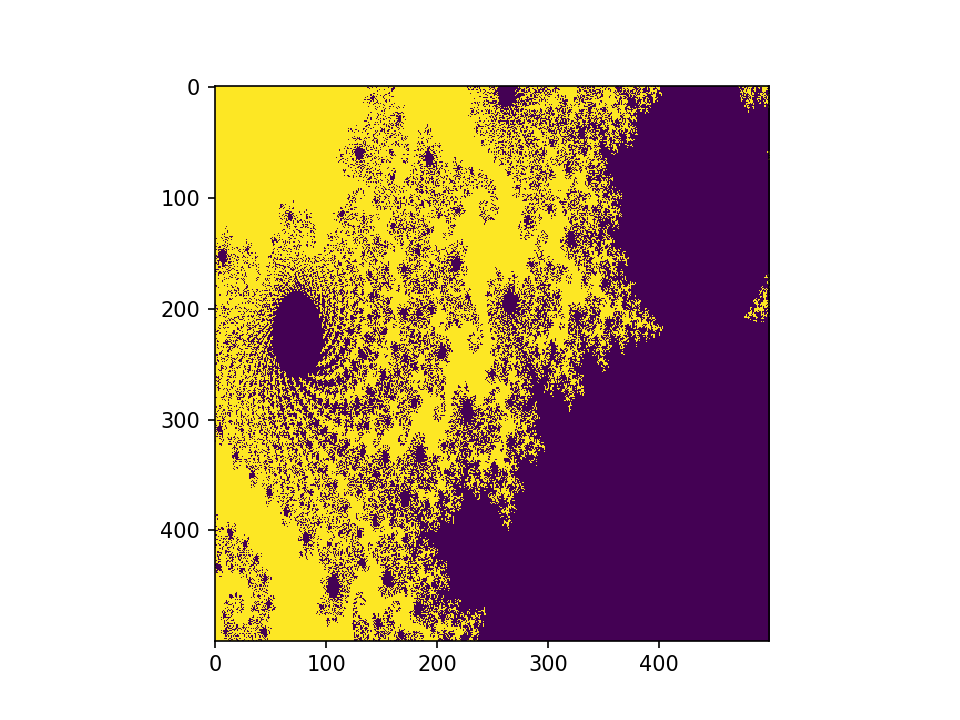

In [16]:
#last zoom (Triple spiral valley):
Z=mandelbrot(500,500,600,-0.057,-0.075,0.6435,0.6544)
isspmatrix(csr_matrix(Z))
plt.imshow(mandelbrot(500,500,600,-0.069,-0.0669,0.6478,0.6490))